In [1]:
%matplotlib inline
from shapely.geometry import Point
from geopandas import datasets, GeoDataFrame, read_file

# NYC Boros
zippath = datasets.get_path('nybb')
polydf = read_file(zippath)

# Generate some points
b = [int(x) for x in polydf.total_bounds]
N = 8
pointdf = GeoDataFrame([
    {'geometry': Point(x, y), 'value1': x + y, 'value2': x - y}
    for x, y in zip(range(b[0], b[2], int((b[2] - b[0]) / N)),
                    range(b[1], b[3], int((b[3] - b[1]) / N)))])

# Make sure they're using the same projection reference
pointdf.crs = polydf.crs


Bad key text.latex.preview in file /Users/danielkent/miniforge3/envs/cv/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/danielkent/miniforge3/envs/cv/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/danielkent/miniforge3/envs/cv/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       

In [2]:
pointdf

geometry   value1  value2
0   POINT (913175.000 120121.000)  1033296  793054
1   POINT (932450.000 139211.000)  1071661  793239
2   POINT (951725.000 158301.000)  1110026  793424
3   POINT (971000.000 177391.000)  1148391  793609
4   POINT (990275.000 196481.000)  1186756  793794
5  POINT (1009550.000 215571.000)  1225121  793979
6  POINT (1028825.000 234661.000)  1263486  794164
7  POINT (1048100.000 253751.000)  1301851  794349
8  POINT (1067375.000 272841.000)  1340216  794534

In [3]:
polydf

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...  
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...

<AxesSubplot:>

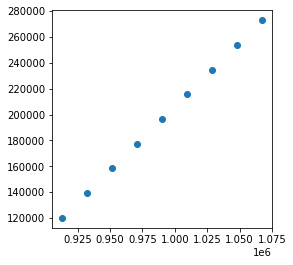

In [4]:
pointdf.plot()


<AxesSubplot:>

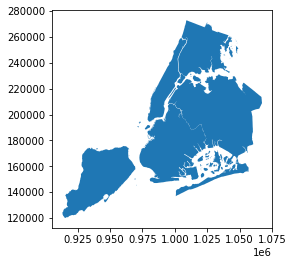

In [5]:
polydf.plot()

In [6]:
join_left_df = pointdf.sjoin(polydf, how="left")
join_left_df
# Note the NaNs where the point did not intersect a boro

geometry   value1  value2  index_right  BoroCode  \
0   POINT (913175.000 120121.000)  1033296  793054          NaN       NaN   
1   POINT (932450.000 139211.000)  1071661  793239          0.0       5.0   
2   POINT (951725.000 158301.000)  1110026  793424          0.0       5.0   
3   POINT (971000.000 177391.000)  1148391  793609          NaN       NaN   
4   POINT (990275.000 196481.000)  1186756  793794          NaN       NaN   
5  POINT (1009550.000 215571.000)  1225121  793979          1.0       4.0   
6  POINT (1028825.000 234661.000)  1263486  794164          4.0       2.0   
7  POINT (1048100.000 253751.000)  1301851  794349          NaN       NaN   
8  POINT (1067375.000 272841.000)  1340216  794534          NaN       NaN   

        BoroName     Shape_Leng    Shape_Area  
0            NaN            NaN           NaN  
1  Staten Island  330470.010332  1.623820e+09  
2  Staten Island  330470.010332  1.623820e+09  
3            NaN            NaN           NaN  
4            NaN            NaN           NaN  
5         Queens  896344.047763  3.045213e+09  
6          Bronx  464392.991824  1.186925e+09  
7            NaN            NaN           NaN  
8            NaN            NaN           NaN

In [7]:
join_right_df = pointdf.sjoin(polydf, how="right")
join_right_df
# Note Staten Island is repeated

index_left     value1    value2  BoroCode       BoroName     Shape_Leng  \
0         1.0  1071661.0  793239.0         5  Staten Island  330470.010332   
0         2.0  1110026.0  793424.0         5  Staten Island  330470.010332   
1         5.0  1225121.0  793979.0         4         Queens  896344.047763   
2         NaN        NaN       NaN         3       Brooklyn  741080.523166   
3         NaN        NaN       NaN         1      Manhattan  359299.096471   
4         6.0  1263486.0  794164.0         2          Bronx  464392.991824   

     Shape_Area                                           geometry  
0  1.623820e+09  MULTIPOLYGON (((970217.022 145643.332, 970227....  
0  1.623820e+09  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  3.045213e+09  MULTIPOLYGON (((1029606.077 156073.814, 102957...  
2  1.937479e+09  MULTIPOLYGON (((1021176.479 151374.797, 102100...  
3  6.364715e+08  MULTIPOLYGON (((981219.056 188655.316, 980940....  
4  1.186925e+09  MULTIPOLYGON (((1012821.806 229228.265, 101278...

In [8]:
join_inner_df = pointdf.sjoin(polydf, how="inner")
join_inner_df
# Note the lack of NaNs; dropped anything that didn't intersect

geometry   value1  value2  index_right  BoroCode  \
1   POINT (932450.000 139211.000)  1071661  793239            0         5   
2   POINT (951725.000 158301.000)  1110026  793424            0         5   
5  POINT (1009550.000 215571.000)  1225121  793979            1         4   
6  POINT (1028825.000 234661.000)  1263486  794164            4         2   

        BoroName     Shape_Leng    Shape_Area  
1  Staten Island  330470.010332  1.623820e+09  
2  Staten Island  330470.010332  1.623820e+09  
5         Queens  896344.047763  3.045213e+09  
6          Bronx  464392.991824  1.186925e+09

In [9]:
pointdf.sjoin(polydf, how="left", op="within")

/Users/danielkent/miniforge3/envs/cv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


geometry   value1  value2  index_right  BoroCode  \
0   POINT (913175.000 120121.000)  1033296  793054          NaN       NaN   
1   POINT (932450.000 139211.000)  1071661  793239          0.0       5.0   
2   POINT (951725.000 158301.000)  1110026  793424          0.0       5.0   
3   POINT (971000.000 177391.000)  1148391  793609          NaN       NaN   
4   POINT (990275.000 196481.000)  1186756  793794          NaN       NaN   
5  POINT (1009550.000 215571.000)  1225121  793979          1.0       4.0   
6  POINT (1028825.000 234661.000)  1263486  794164          4.0       2.0   
7  POINT (1048100.000 253751.000)  1301851  794349          NaN       NaN   
8  POINT (1067375.000 272841.000)  1340216  794534          NaN       NaN   

        BoroName     Shape_Leng    Shape_Area  
0            NaN            NaN           NaN  
1  Staten Island  330470.010332  1.623820e+09  
2  Staten Island  330470.010332  1.623820e+09  
3            NaN            NaN           NaN  
4            NaN            NaN           NaN  
5         Queens  896344.047763  3.045213e+09  
6          Bronx  464392.991824  1.186925e+09  
7            NaN            NaN           NaN  
8            NaN            NaN           NaN